# NoisePy4DAS: SeaDAS-N

- Yiyu Ni (niyiyu@uw.edu)
- Department of Earth and Space Sciences, University of Washington
    
#### SeaDAS-N
(a) Map showing the location of the SeaDAS-N cable (solid line) connecting Seattle and Bothell campus of the University of Washington in Seattle, Washington, United States. Only the red segment was used during December 2022 for data collection. (b) One-hour SeaDAS-N raw data (in radians) of all 2089 channels. The Sintela Onyx interrogator unit samples at 100 Hz, with 4.78-meter channel spacing and 9.56-meter gauge length. The example plot starts 2022-12-15 13:30:00 UTC. The gray region indicates a one-minute data gap. The clipped sub-array (channel $\sim$1100-1700) is from the segment where the cable is above the ground.

![title](https://github.com/niyiyu/NoisePy4DAS-SeaDAS/blob/main/figures/seadas_december_overview.png?raw=true)

**If you run the tutorial through docker, or if you clone the repo, run the cell below**

In [1]:
# on Docker/local
import sys
sys.path.append("../../NoisePy4DAS-SeaDAS/src")

## import necessary packages

In [2]:
import os
import time
from datetime import datetime, timedelta
import dascore as dc

import h5py
import numpy as np
import DAS_module
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
cha_spacing = 4.78
gauge_length = 9.56
nchas = 2089
print(f"number of channels: {nchas}")
print(f"channel spacing: {cha_spacing} meter")
print(f"guage length: {gauge_length} meter")

number of channels: 2089
channel spacing: 4.78 meter
guage length: 9.56 meter


## index & read data

In [17]:
!ls -lah ../data

total 983256
drwxr-xr-x  13 niyiyu  staff   416B Apr  1 08:42 .
drwxr-xr-x   8 niyiyu  staff   256B Apr  1 08:14 ..
-rw-r--r--   1 niyiyu  staff   248K Apr  1 08:42 .dascore_index.h5
-rw-r--r--   1 niyiyu  staff    48M Apr  1 08:18 seadasn_2022-12-01_00-00-00_GMT.h5
-rw-r--r--   1 niyiyu  staff    48M Apr  1 08:19 seadasn_2022-12-01_00-01-00_GMT.h5
-rw-r--r--   1 niyiyu  staff    48M Apr  1 08:21 seadasn_2022-12-01_00-02-00_GMT.h5
-rw-r--r--   1 niyiyu  staff    48M Apr  1 08:22 seadasn_2022-12-01_00-03-00_GMT.h5
-rw-r--r--   1 niyiyu  staff    48M Apr  1 08:22 seadasn_2022-12-01_00-04-00_GMT.h5
-rw-r--r--   1 niyiyu  staff    48M Apr  1 08:34 seadasn_2022-12-01_00-05-00_GMT.h5
-rw-r--r--   1 niyiyu  staff    48M Apr  1 08:35 seadasn_2022-12-01_00-06-00_GMT.h5
-rw-r--r--   1 niyiyu  staff    48M Apr  1 08:40 seadasn_2022-12-01_00-07-00_GMT.h5
-rw-r--r--   1 niyiyu  staff    48M Apr  1 08:40 seadasn_2022-12-01_00-08-00_GMT.h5
-rw-r--r--   1 niyiyu  staff    48M Apr  1 08:40 seadasn_2022

In [20]:
!h5dump ../data/.dascore_index.h5

HDF5 "../data/.dascore_index.h5" {
GROUP "/" {
   ATTRIBUTE "CLASS" {
      DATATYPE  H5T_STRING {
         STRSIZE 5;
         STRPAD H5T_STR_NULLTERM;
         CSET H5T_CSET_UTF8;
         CTYPE H5T_C_S1;
      }
      DATASPACE  SCALAR
      DATA {
      (0): "GROUP"
      }
   }
   ATTRIBUTE "PYTABLES_FORMAT_VERSION" {
      DATATYPE  H5T_STRING {
         STRSIZE 3;
         STRPAD H5T_STR_NULLTERM;
         CSET H5T_CSET_UTF8;
         CTYPE H5T_C_S1;
      }
      DATASPACE  SCALAR
      DATA {
      (0): "2.1"
      }
   }
   ATTRIBUTE "TITLE" {
      DATATYPE  H5T_STRING {
         STRSIZE 1;
         STRPAD H5T_STR_NULLTERM;
         CSET H5T_CSET_UTF8;
         CTYPE H5T_C_S1;
      }
      DATASPACE  NULL
      DATA {
      }
   }
   ATTRIBUTE "VERSION" {
      DATATYPE  H5T_STRING {
         STRSIZE 3;
         STRPAD H5T_STR_NULLTERM;
         CSET H5T_CSET_UTF8;
         CTYPE H5T_C_S1;
      }
      DATASPACE  SCALAR
      DATA {
      (0): "1.0"
      }
   }
   GROUP "

               (55410): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (55428): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (55446): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (55464): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (55482): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (55500): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (55518): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (55536): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (55554): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (55572): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (55590): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (55608): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (55626): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

               (2490): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (2503): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (2516): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (2529): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (2542): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (2555): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (2568): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (2581): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (2594): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (2607): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (2620): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (2633): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (2646): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (2659): ""

               (64409): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (64422): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (64435): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (64448): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (64461): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (64474): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (64487): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (64500): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (64513): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (64526): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (64539): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (64552): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (64565): "", "", "", "", "", "", "", "", "", "", "", "", "",
            

               (126939): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (126952): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (126965): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (126978): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (126991): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (127004): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (127017): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (127030): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (127043): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (127056): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (127069): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (127082): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (127095): "", "", "", "", "", "", "", "", "", "", "", "", "",


               (74544): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (74562): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (74580): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (74598): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (74616): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (74634): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (74652): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (74670): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (74688): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (74706): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (74724): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (74742): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               (74760): 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

               (16413): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (16426): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (16439): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (16452): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (16465): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (16478): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (16491): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (16504): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (16517): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (16530): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (16543): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (16556): "", "", "", "", "", "", "", "", "", "", "", "", "",
               (16569): "", "", "", "", "", "", "", "", "", "", "", "", "",
            

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
spool = dc.spool("../data/").update().chunk(time=60.01, overlap=10)
minute_data = np.copy(spool[0].data.T)
minute_data.shape

(2089, 6001)

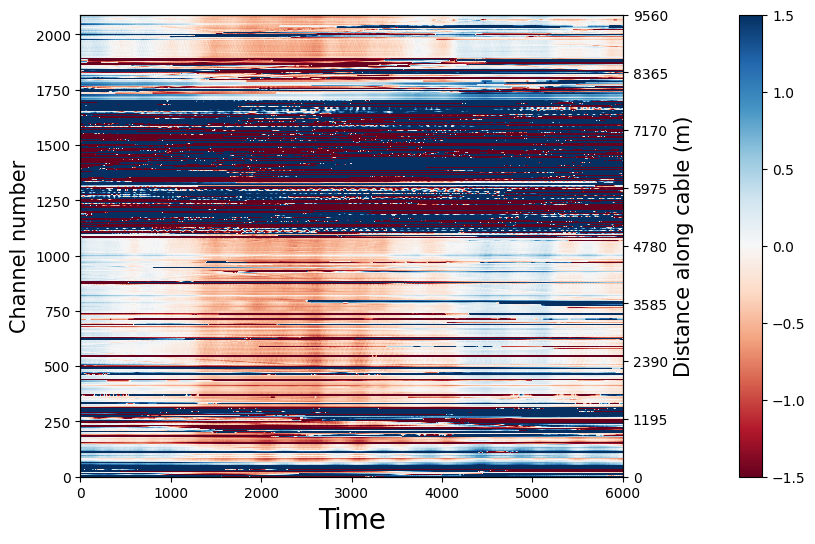

In [8]:
plt.figure(figsize = (10, 6), dpi = 100)
plt.imshow(minute_data, aspect = 'auto', extent = [0, 6000, 0, nchas],
           cmap = 'RdBu', vmax = 1.5, vmin = -1.5, origin='lower')
plt.ylabel("Channel number", fontsize = 15)
plt.xlabel("Time", fontsize = 20)
plt.ylim([0, 2089])
twiny = plt.gca().twinx()
twiny.set_yticks(np.linspace(0, 2000, 9), 
                [int(i* cha_spacing) for i in np.linspace(0, 2000, 9)])
twiny.set_ylabel("Distance along cable (m)", fontsize = 15)
plt.colorbar(pad = 0.15)

## 3 cross-correlate with NoisePy4DAS
### 3.1 parameters

In [9]:
sps       = 100                 # current sampling rate
samp_freq = 50                  # targeted sampling rate
freqmin   = 1                   # pre filtering frequency bandwidth
freqmax   = 49.9                  # note this cannot exceed Nquist freq

freq_norm   = 'rma'             # 'no' for no whitening, or 'rma' for running-mean average, 'phase_only' for sign-bit normalization in freq domain.
time_norm   = 'one_bit'         # 'no' for no normalization, or 'rma', 'one_bit' for normalization in time domain
cc_method   = 'xcorr'           # 'xcorr' for pure cross correlation, 'deconv' for deconvolution; FOR "COHERENCY" PLEASE set freq_norm to "rma", time_norm to "no" and cc_method to "xcorr"
smooth_N    = 100               # moving window length for time domain normalization if selected (points)
smoothspect_N  = 100            # moving window length to smooth spectrum amplitude (points)
maxlag      = 8                 # lags of cross-correlation to save (sec)

# criteria for data selection
max_over_std = 10               # threahold to remove window of bad signals: set it to 10*9 if prefer not to remove them

cc_len = 60                     # correlate length in second
step   = 60                     # stepping length in second

# start and end channel index for the sub-array
cha1, cha2 = 500, 1000

cha_list = np.array(range(cha1, cha2)) 
nsta = len(cha_list)
n_pair = int((nsta+1)*nsta/2)
n_lag = maxlag * samp_freq * 2 + 1

prepro_para = {'freqmin':freqmin,
               'freqmax':freqmax,
               'sps':sps,
               'npts_chunk':cc_len*sps,
               'nsta':nsta,
               'cha_list':cha_list,
               'samp_freq':samp_freq,
               'freq_norm':freq_norm,
               'time_norm':time_norm,
               'cc_method':cc_method,
               'smooth_N':smooth_N,
               'smoothspect_N':smoothspect_N,
               'maxlag':maxlag,
               'max_over_std':max_over_std}

# # you can save this parameter file to local
# metadata = os.path.join(CCFDIR, 'prepro_fft_info.txt')
# # output parameter info
# fout = open(metadata,'w')
# fout.write(str(prepro_para));fout.close()

In [10]:
spool

DASCore DirectorySpool 🧵 (9 Patches)
    Path: /Users/niyiyu/Desktop/EarthScope-DAS/notebooks/../data

### 3.3 pre-processing

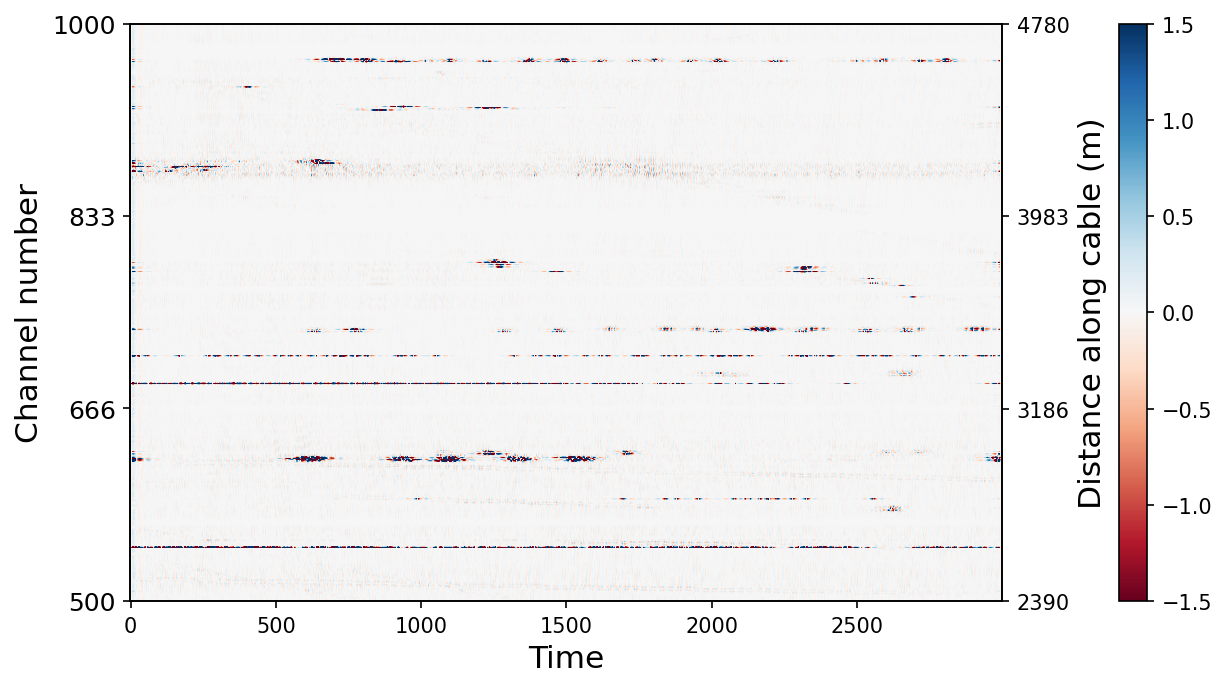

In [10]:
trace_stdS, dataS = DAS_module.preprocess_raw_make_stat(minute_data[cha1:cha2, :-1].T, prepro_para)

plt.figure(figsize = (10, 5), dpi = 150)
plt.imshow(dataS, aspect = 'auto', 
           cmap = 'RdBu', vmax = 1.5, vmin = -1.5, origin='lower')
_ =plt.yticks(np.linspace(cha1, cha2, 4) - cha1, 
              [int(i) for i in np.linspace(cha1, cha2, 4)], fontsize = 12)
plt.ylabel("Channel number", fontsize = 15)
plt.xlabel("Time", fontsize = 15)
twiny = plt.gca().twinx()
twiny.set_yticks(np.linspace(0, cha2 - cha1, 4), 
                             [int(i* cha_spacing) for i in np.linspace(cha1, cha2, 4)])
twiny.set_ylabel("Distance along cable (m)", fontsize = 15)
plt.colorbar(pad = 0.1)

### 3.4 FFT, temporal and frequency normalizaiton (if specified)

In [11]:
white_spect = DAS_module.noise_processing(dataS, prepro_para)
Nfft = white_spect.shape[1]; Nfft2 = Nfft // 2
data = white_spect[:, :Nfft2]
# del dataS, white_spect

print(data.shape, data.dtype)

(500, 1500) complex64


### 3.5 channel-pair selection

In [12]:
ind = np.where((trace_stdS < prepro_para['max_over_std']) &
                        (trace_stdS > 0) &
                (np.isnan(trace_stdS) == 0))[0]
if not len(ind):
    raise ValueError('the max_over_std criteria is too high which results in no data')
sta = cha_list[ind]
white_spect = data[ind]

print(white_spect.shape, white_spect.dtype)

(429, 1500) complex64


### 3.6 cross-correlate over all channel pairs

In [13]:
# loop over all stations
for iiS in range(len(sta)):
    # smooth the source spectrum
    sfft1 = DAS_module.smooth_source_spect(white_spect[iiS], prepro_para)

    # correlate one source with all receivers
    corr, tindx = DAS_module.correlate(sfft1, white_spect[iiS:], prepro_para, Nfft)
    
    print(f"source channel index: {sta[iiS]}, correlation shape: {corr.shape}")
    break

source channel index: 500, correlation shape: (429, 801)


## 4 10-minute linear stacking
We create this `corr_full` and `stack_full` matrix to store a sub-stacking results. More specifically, we linearly stack each minute of correlation in memory, and only save the hourly stacking to the CCF storage (local ASDF, S3, etc.)

In [14]:
corr_full = np.zeros([n_lag, n_pair], dtype = np.float32)
stack_full = np.zeros([1, n_pair], dtype = np.int32)
task_t0 = datetime(year = 2022, month = 12, day = 1, 
                   hour = 0, minute = 0, second = 0, microsecond = 0)

n_minute = 10

We loop over all data chunk. Reminder that the data is on the cloud, and computing is made on this server. So we are downloading the data as we compute at the same time (async option?)

In [15]:
spool

DASCore DirectorySpool 🧵 (11 Patches)
    Path: /Users/niyiyu/Desktop/EarthScope-DAS/notebooks/../data

In [16]:
# each task is one minute
pbar = tqdm(spool)
t_query = 0; t_compute = 0
for patch in pbar:
    t0 = time.time()
    pbar.set_description(f"Processing {task_t0}")
    task_t0 += timedelta(minutes = 1)
    tdata = np.copy(patch.data[:, cha1:cha2])
    if tdata.shape[0] > 6000:
        tdata = tdata[:-1, :]
    t_query += time.time() - t0

    t1 = time.time()
    # perform pre-processing
    trace_stdS, dataS = DAS_module.preprocess_raw_make_stat(tdata, prepro_para)

    # do normalization if needed
    white_spect = DAS_module.noise_processing(dataS, prepro_para)
    Nfft = white_spect.shape[1]; Nfft2 = Nfft // 2
    data = white_spect[:, :Nfft2]
    del dataS, white_spect

    ind = np.where((trace_stdS < prepro_para['max_over_std']) &
                            (trace_stdS > 0) &
                    (np.isnan(trace_stdS) == 0))[0]
    if not len(ind):
        raise ValueError('the max_over_std criteria is too high which results in no data')
    sta = cha_list[ind]
    white_spect = data[ind]

    # loop over all stations
    for iiS in range(len(sta)):
        # smooth the source spectrum
        sfft1 = DAS_module.smooth_source_spect(white_spect[iiS], prepro_para)
        
        # correlate one source with all receivers
        corr, tindx = DAS_module.correlate(sfft1, white_spect[iiS:], prepro_para, Nfft)

        # update the receiver list
        tsta = sta[iiS:]
        receiver_lst = tsta[tindx]

        iS = int((cha2*2 - cha1 - sta[iiS] + 1) * (sta[iiS] - cha1) / 2)

        # stacking one minute
        corr_full[:, iS + receiver_lst - sta[iiS]] += corr.T
        stack_full[:, iS + receiver_lst - sta[iiS]] += 1
        
    t_compute += time.time() - t1
corr_full /= stack_full
print("%.3f seconds in data query, %.3f seconds in xcorr computing" % (t_query, t_compute))

Processing 2022-12-01 00:10:00: 100%|██████████| 11/11 [01:02<00:00,  5.65s/it]

0.040 seconds in data query, 61.298 seconds in xcorr computing



/var/folders/s7/mlt2psts3d15c52xshct76fw0000gn/T/ipykernel_40599/3038632153.py:50: RuntimeWarning: invalid value encountered in divide
  corr_full /= stack_full


## 5 visualize and save CCF 

Text(0, 0.5, 'Distance along cable (m)')

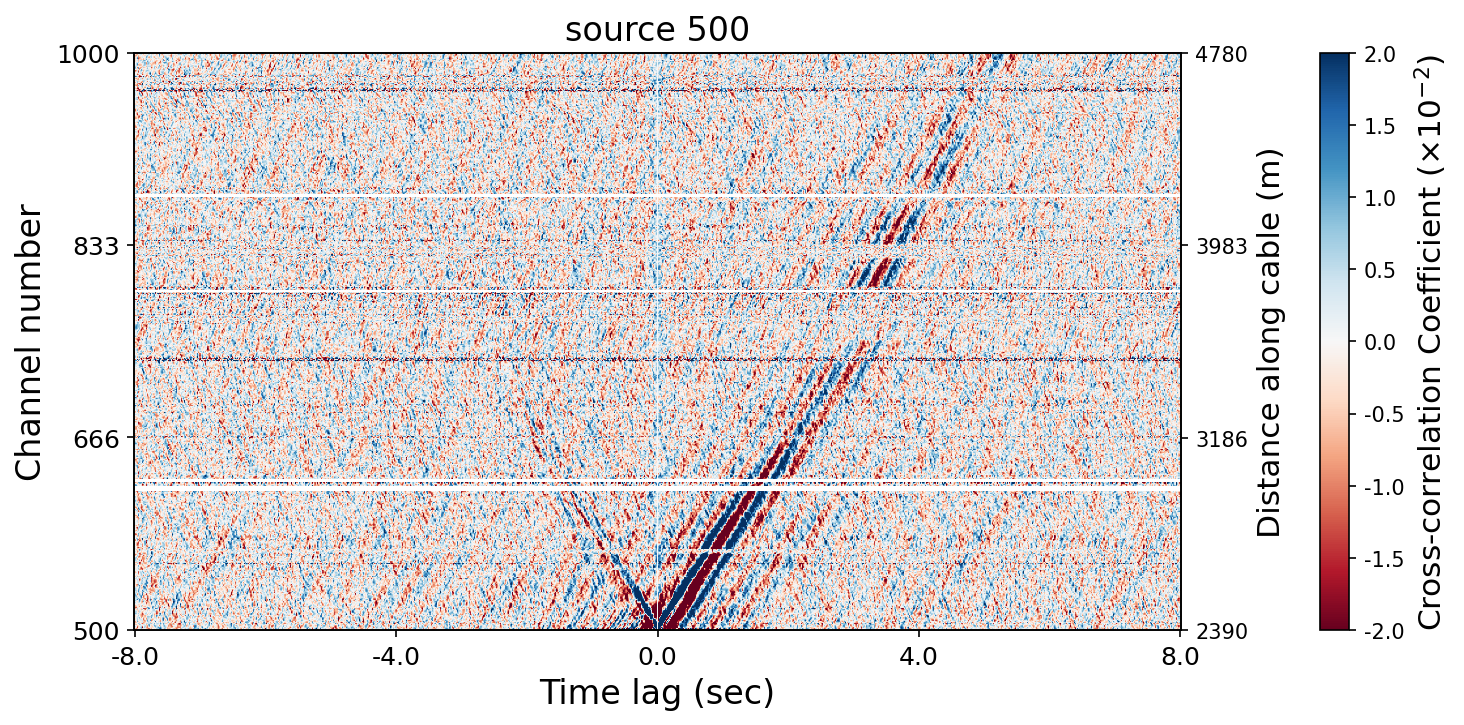

In [18]:
plt.figure(figsize = (12, 5), dpi = 150)

plt.imshow(corr_full[:, :(cha2 - cha1)].T, aspect = 'auto', cmap = 'RdBu', 
           vmax = 2e-2, vmin = -2e-2, origin = 'lower', interpolation=None)

_ =plt.yticks(np.linspace(cha1, cha2, 4) - cha1, 
              [int(i) for i in np.linspace(cha1, cha2, 4)], fontsize = 12)
_ = plt.xticks(np.arange(0, 801, 200), (np.arange(0, 801, 200) - 400)/50, fontsize = 12)
plt.ylabel("Channel number", fontsize = 16)
plt.xlabel("Time lag (sec)", fontsize = 16)
plt.title("source 500", fontsize = 16)
bar = plt.colorbar(pad = 0.1, format = lambda x, pos: '{:.1f}'.format(x*100))
bar.set_label('Cross-correlation Coefficient ($\\times10^{-2}$)', fontsize = 15)

twiny = plt.gca().twinx()
twiny.set_yticks(np.linspace(0, cha2 - cha1, 4), 
                             [int(i* cha_spacing) for i in np.linspace(cha1, cha2, 4)])
twiny.set_ylabel("Distance along cable (m)", fontsize = 15)